<a href="https://colab.research.google.com/github/ishancoderr/3D_modeling/blob/main/tweety01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 	Choose an event/campaign that happened in the UK or worldwide recently (eg., Brexit). Apply sentiment analysis to show users’ opinions about the topic on Twitter. Represent your findings using statistical descriptive methods. 

In [23]:
import tweepy
from textblob import TextBlob
consumer_key='MiPlOEtMiZDUU0A286jcN3jrr'
consumer_secret_key='O9nv0WXPkcHgu6ry2CweZOgp08lA19na5TXxWQNl4Xw1FiH5NI'
access_token='1498074007-l0DlAvQPXooOd5oNJCCuV9LIHa3yzjUgT1VBl7R'
access_token_secret='oFqbnqacvyLxuDUrNF4Jzao0W7TaHBwFc9odVxQ9GvjA4'

In [24]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
posts=api.user_timeline(screen_name='Brexit',count=100,lang="en",tweet_mode="extended")
print('Show the 5 recent tweets:\n')
for tweet in posts[0:5]:
  print(tweet.full_text+'\n')


Show the 5 recent tweets:

These are the allegations facing Boris Johnson, and what might happen next https://t.co/gjVFuGBj8r

RT @Joe_Mayes: This week I was in Hartlepool and here's what I learnt about British politics in a Brexit heartland 1/ https://t.co/Q0qPCMjd…

Northern Irish voters continue to oppose uniting the two sides of the island, a poll shows https://t.co/X1jMErLvr4

Boris Johnson believes the British public is unfussed by his “cash for curtains” scandal, but class is dangerous territory in the U.K., says Martin Ivens https://t.co/eLC3PwGFES

Boris Johnson is trying to win another district in Labour's heartland just as he faces a scandal over allegations about his conduct https://t.co/CJgY29oB6T



In [25]:
import pandas as pd

df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,These are the allegations facing Boris Johnson...
1,RT @Joe_Mayes: This week I was in Hartlepool a...
2,Northern Irish voters continue to oppose uniti...
3,Boris Johnson believes the British public is u...
4,Boris Johnson is trying to win another distric...


In [26]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['Tweets']=df['Tweets'].apply(cleanData)

#show data
df

,Tweets
0,These are the allegations facing Boris Johnson...
1,_Mayes: This week I was in Hartlepool and here...
2,Northern Irish voters continue to oppose uniti...
3,Boris Johnson believes the British public is u...
4,Boris Johnson is trying to win another distric...
...,...
95,"100 days after Brexit, a key question is wheth..."
96,"Biden tackles gun violence, while the true sca..."
97,The British monarchy has survived exactly beca...
98,: EXPLAINED: What's behind the violence in Nor...


In [27]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,subjectivity,Polarity
0,These are the allegations facing Boris Johnson...,0.000000,0.00
1,_Mayes: This week I was in Hartlepool and here...,0.000000,0.00
2,Northern Irish voters continue to oppose uniti...,0.000000,0.00
3,Boris Johnson believes the British public is u...,0.322222,-0.20
4,Boris Johnson is trying to win another distric...,0.400000,0.80
...,...,...,...
95,"100 days after Brexit, a key question is wheth...",1.000000,0.00
96,"Biden tackles gun violence, while the true sca...",0.375000,0.20
97,The British monarchy has survived exactly beca...,0.426667,0.07
98,: EXPLAINED: What's behind the violence in Nor...,0.700000,-0.40


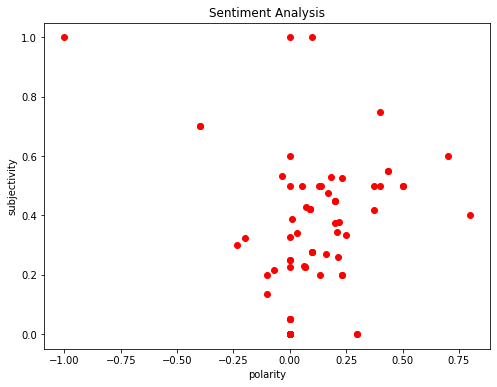

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='red')

plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

[0.0, 0.0, 0.0, 0.32222222222222224, 0.4, 0.0, 0.0, 0.25, 0.0, 0.25, 0.3333333333333333, 0.41666666666666663, 0.05, 0.5277777777777778, 0.5, 0.0, 0.05, 0.0, 0.13333333333333333, 0.21428571428571427, 0.0, 0.5, 0.0, 0.0, 0.0, 0.26988636363636365, 0.0, 0.22625, 0.0, 0.0, 0.0, 0.0, 0.45, 0.75, 0.45, 0.19999999999999998, 0.45, 0.22916666666666666, 0.0, 0.5, 0.0, 0.0, 0.5333333333333333, 0.0, 0.0, 0.0, 0.47590909090909095, 0.0, 0.19999999999999998, 0.0, 0.0, 0.19999999999999998, 0.0, 0.0, 0.3888888888888889, 0.0, 0.2, 0.0, 0.5, 0.0, 0.0, 0.34166666666666673, 0.42000000000000004, 0.275, 0.0, 0.0, 0.22727272727272727, 0.3, 0.3444444444444445, 0.0, 0.275, 1.0, 0.275, 0.0, 0.5499999999999999, 0.42000000000000004, 0.0, 0.5499999999999999, 0.42000000000000004, 0.5, 0.0, 0.6, 0.22727272727272727, 1.0, 0.05, 0.37777777777777777, 0.49756493506493504, 0.5266666666666666, 0.0, 0.5, 0.25833333333333336, 0.6000000000000001, 0.5, 0.0, 0.3277777777777778, 1.0, 0.375, 0.42666666666666664, 0.7, 0.7]
{0.0: 40

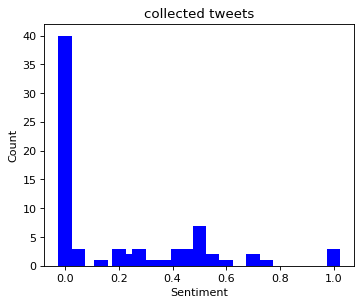

In [29]:
from collections import Counter
import numpy as np
m=df['subjectivity']
n= np.array(m) 
A=[]
for i in range(len(n)):
  s=n[i]
  A.append(s)

print(A)
a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.figure(figsize=(5,4), dpi= 80)

plt.bar(keys, values, color='blue', width=0.05)
plt.title('collected tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

[0.0, 0.0, 0.0, -0.19999999999999998, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.375, 0.0, 0.18333333333333335, 0.13636363636363635, 0.0, 0.0, 0.0, -0.09999999999999999, -0.07142857142857142, 0.0, 0.5, 0.0, 0.0, 0.0, 0.1590909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.4, 0.2, 0.13333333333333333, 0.2, 0.0625, 0.0, 0.375, 0.0, 0.0, -0.033333333333333354, 0.0, 0.0, 0.0, 0.16893939393939394, 0.0, 0.2333333333333333, 0.0, 0.0, 0.2333333333333333, 0.0, 0.0, 0.011111111111111108, 0.0, -0.1, 0.0, 0.05208333333333334, 0.0, 0.0, 0.03333333333333333, 0.09, 0.1, 0.0, 0.3, 0.06818181818181818, -0.2333333333333333, 0.2111111111111111, 0.0, 0.1, -1.0, 0.1, 0.0, 0.43333333333333335, 0.09, 0.0, 0.43333333333333335, 0.09, 0.5, 0.0, 0.0, 0.06818181818181818, 0.1, 0.0, 0.21666666666666667, 0.1305194805194805, 0.22999999999999998, 0.3, 0.0, 0.2125, 0.7, 0.4, 0.0, 1.850371707708594e-17, 0.0, 0.19999999999999998, 0.07, -0.4, -0.4]
{0.0: 47, -0.19999999999999998: 1, 0.8: 1, 0.25: 1, 0.375: 2, 0.1833333333333

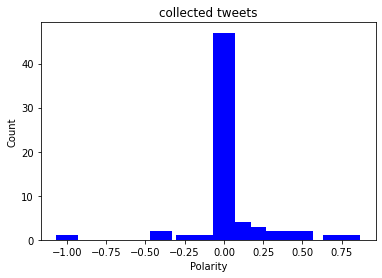

In [30]:
from collections import Counter
import numpy as np
m=df['Polarity']
n=np.array(m) 
A=[]
for i in range(len(n)):
  s=n[i]
  
  A.append(s)

print(A)
a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.bar(keys, values, color='blue', width=0.14)
plt.title('collected tweets')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

2.	**Access News APIs for articles related to the chosen event/campaign (Minimum of 5 articles)** 


*   Perform all required cleaning and pre-processing on the articles.
*   Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).

*   Use topic modelling techniques to discover key topics. Display your findings using proper graphs, such as word cloud.
* Provide a summary on one of the news articles. Comment on the summarisation quality  


In [35]:
!pip install newsapi-python

In [36]:
from newsapi import NewsApiClient
import datetime as dt
import pandas as pd

In [37]:
my_api_key='37925137cd4749ad8db14762cf5dd24d'
newsapi = NewsApiClient(api_key=my_api_key)

In [38]:
all_articles = newsapi.get_everything(q='Brexit',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [39]:
type(all_articles)

dict

In [41]:
all_articles 

{'articles': [{'author': 'https://www.facebook.com/bbcnews',
   'content': 'By Jayne McCormackBBC News NI Political Reporter\r\nRumours about bids to remove Arlene Foster from the helm of the Democratic Unionist Party (DUP) had been swirling for months.\r\nOn many occasions they… [+4002 chars]',
   'description': "The BBC's Jayne McCormack takes a look at what lies behind the ousting of NI's first minister.",
   'publishedAt': '2021-04-28T15:16:48Z',
   'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'title': 'Arlene Foster: Why did the DUP move against its leader?',
   'url': 'https://www.bbc.co.uk/news/uk-northern-ireland-56907858',
   'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/12E8D/production/_118235477_arlene2_pa.jpg'},
  {'author': 'https://www.facebook.com/bbcnews',
   'content': 'image captionEU Commission chief Ursula von der Leyen oversees trade relations with the UK\r\nThe European Parliament is expected to ratify the post-Brexit EU-UK trade deal, am

In [42]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [43]:
all_articles['status']

'ok'

In [44]:
all_articles['totalResults']

104

In [45]:
x=all_articles['articles']

In [46]:
df=pd.DataFrame(x)
                            
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arlene Foster: Why did the DUP move against it...,The BBC's Jayne McCormack takes a look at what...,https://www.bbc.co.uk/news/uk-northern-ireland...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-28T15:16:48Z,By Jayne McCormackBBC News NI Political Report...
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,French warn UK ahead of vote on Brexit trade deal,French concern over fishing rights overshadows...,https://www.bbc.co.uk/news/world-europe-56899831,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-27T09:21:09Z,image captionEU Commission chief Ursula von de...
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Daily Crunch: Apple Arcade expands with classi...,"Apple adds classic titles to Apple Arcade, Mic...",https://techcrunch.com/2021/04/02/daily-crunch...,https://s.yimg.com/uu/api/res/1.2/Z.DSTEMdfzA7...,2021-04-02T22:10:28Z,"(Bloomberg) -- Britishvolt Ltd., the developer..."
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,NI riots: Church leaders plead for unified pol...,The Catholic and Protestant clergymen say the ...,https://www.bbc.co.uk/news/uk-northern-ireland...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-13T05:28:34Z,image copyrightChurch Leaders Group (Ireland) ...
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arts venues urge PM to act over post-Brexit to...,"The Royal Shakespeare Company, Royal Opera Hou...",https://www.bbc.co.uk/news/entertainment-arts-...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-28T12:01:20Z,image copyrightGetty Images\r\nimage captionTh...


**Perform all required cleaning and pre-processing on the articles**

In [56]:
import re
#cleaning data
def cleanData(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#Remove @mentions
  text=re.sub(r'#','',text)#Remove #mentions
  text=re.sub(r':','',text)#Remove :
  text=re.sub(r',','',text)#Remove ,
  text=re.sub(r'RT[\s]+','',text)#Remove RT mentions
  text=re.sub(r'https?:\/\/\S+','',text)#Remove hyper links

  return text

df['description']=df['description'].apply(cleanData)
df['title']=df['title'].apply(cleanData)
df['content']=df['content'].apply(cleanData)
df['index'] = df.index
#show data
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content,index
0,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arlene Foster Why did the DUP move against its...,The BBC's Jayne McCormack takes a look at what...,https://www.bbc.co.uk/news/uk-northern-ireland...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-28T15:16:48Z,By Jayne McCormackBBC News NI Political Report...,0
1,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,French warn UK ahead of vote on Brexit trade deal,French concern over fishing rights overshadows...,https://www.bbc.co.uk/news/world-europe-56899831,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-27T09:21:09Z,image captionEU Commission chief Ursula von de...,1
2,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Daily Crunch Apple Arcade expands with classic...,Apple adds classic titles to Apple Arcade Micr...,https://techcrunch.com/2021/04/02/daily-crunch...,https://s.yimg.com/uu/api/res/1.2/Z.DSTEMdfzA7...,2021-04-02T22:10:28Z,(Bloomberg) -- Britishvolt Ltd. the developer ...,2
3,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,NI riots Church leaders plead for unified poli...,The Catholic and Protestant clergymen say the ...,https://www.bbc.co.uk/news/uk-northern-ireland...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-13T05:28:34Z,image copyrightChurch Leaders Group (Ireland) ...,3
4,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Arts venues urge PM to act over post-Brexit to...,The Royal Shakespeare Company Royal Opera Hous...,https://www.bbc.co.uk/news/entertainment-arts-...,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-04-28T12:01:20Z,image copyrightGetty Images\r\nimage captionTh...,4


In [143]:
new_data=df[['index','title','description','publishedAt','content','url']]

**Perform basic descriptive analysis of the collected articles (time distribution, word counts. etc).**

{'04': 18, '05': 2}


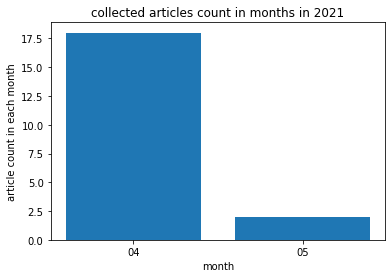

In [144]:
from collections import Counter
import numpy as np
m=new_data['publishedAt']
n=np.array(m) 
A=[]
for i in range(len(n)):
  string=n[i]
  s=string[5:7]
  A.append(s)
  
  

a = dict(Counter(A))
print(a)
a_dictionary = a
keys = a_dictionary.keys()
values = a_dictionary.values()

plt.bar(keys, values)
plt.title('collected articles count in months in 2021')
plt.xlabel('month')
plt.ylabel('article count in each month')
plt.show()

In [145]:
new_data['description_count']=new_data['description'].apply(lambda n:len(n.split(' ')))
new_data['title_count']=new_data['title'].apply(lambda n:len(n.split(' ')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
new_data

,index,title,description,publishedAt,content,url,description_count,title_count
0,0,Arlene Foster Why did the DUP move against its...,The BBC's Jayne McCormack takes a look at what...,2021-04-28T15:16:48Z,By Jayne McCormackBBC News NI Political Report...,https://www.bbc.co.uk/news/uk-northern-ireland...,17,10
1,1,French warn UK ahead of vote on Brexit trade deal,French concern over fishing rights overshadows...,2021-04-27T09:21:09Z,image captionEU Commission chief Ursula von de...,https://www.bbc.co.uk/news/world-europe-56899831,14,10
2,2,Daily Crunch Apple Arcade expands with classic...,Apple adds classic titles to Apple Arcade Micr...,2021-04-02T22:10:28Z,(Bloomberg) -- Britishvolt Ltd. the developer ...,https://techcrunch.com/2021/04/02/daily-crunch...,24,8
3,3,NI riots Church leaders plead for unified poli...,The Catholic and Protestant clergymen say the ...,2021-04-13T05:28:34Z,image copyrightChurch Leaders Group (Ireland) ...,https://www.bbc.co.uk/news/uk-northern-ireland...,14,9
4,4,Arts venues urge PM to act over post-Brexit to...,The Royal Shakespeare Company Royal Opera Hous...,2021-04-28T12:01:20Z,image copyrightGetty Images\r\nimage captionTh...,https://www.bbc.co.uk/news/entertainment-arts-...,16,10
5,5,8 investors founders and execs predict cyberse...,Things have been looking up for Belfast since ...,2021-04-24T06:38:29Z,Things have been looking up for Belfast since ...,https://techcrunch.com/2021/04/23/8-investors-...,30,13
6,6,Welsh election Party leaders on beds of nails ...,As the Welsh election nears three party leader...,2021-04-25T06:23:33Z,By James WilliamsBBC Wales political correspon...,https://www.bbc.co.uk/news/uk-wales-politics-5...,16,12
7,7,UK and Norway fail to reach fishing deal,Hundreds of crew members will be out of work a...,2021-04-29T20:10:24Z,The UK and Norway have failed to reach a fishi...,https://www.bbc.co.uk/news/uk-politics-56932551,19,8
8,8,Billionaire Sir James Dyson moves residency ba...,Sir James faced criticism in 2019 over relocat...,2021-04-22T04:06:50Z,image copyrightJason Kempin\r\nimage captionHe...,https://www.bbc.co.uk/news/business-56840781,14,10
9,9,Big Yorkshire Conversation survey asks 'What i...,Is it the no nonsense straight-talking? The to...,2021-05-02T06:49:58Z,image copyrightGetty Images\r\nimage captionSt...,https://www.bbc.co.uk/news/uk-england-humber-5...,15,8


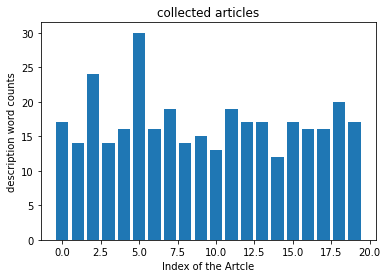

In [147]:
plt.bar(new_data['index'],new_data['description_count'])
plt.title('collected articles')
plt.xlabel('Index of the Artcle')
plt.ylabel('description word counts')
plt.show()

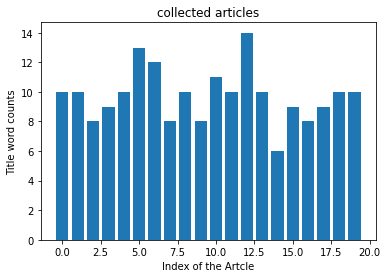

In [148]:
plt.bar(new_data['index'],new_data['title_count'])
plt.title('collected articles')
plt.xlabel('Index of the Artcle')
plt.ylabel('Title word counts')
plt.show()

**Use topic modelling techniques to discover key topics. Display your findings using proper graphs, such as word cloud.**

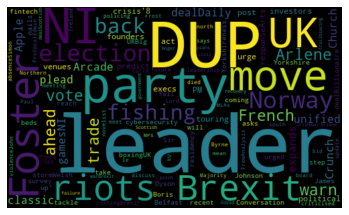

In [149]:
from wordcloud import WordCloud
#Plot the world cloud
allwords=''.join([twts for twts in new_data['title']])
WordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allwords)
plt.imshow(WordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**Provide a summary on one of the news articles. Comment on the summarisation quality**

In [150]:
!pip install transformers

In [151]:
from transformers import pipeline
summarization=pipeline("summarization")

In [155]:
orginal_text=new_data['content']
y=str(orginal_text[0])
print(y)
url=new_data['url']
url=str(url[0])
print(url)

By Jayne McCormackBBC News NI Political Reporter
Rumours about bids to remove Arlene Foster from the helm of the Democratic Unionist Party (DUP) had been swirling for months.
On many occasions they… [+4002 chars]
https://www.bbc.co.uk/news/uk-northern-ireland-56907858


In [209]:

import urllib.request
from bs4 import BeautifulSoup
import re
import pandas as pd
import requests

In [247]:
#load html code from a url
page = requests.get(url)
type(page)
soup = BeautifulSoup(page.content, 'html.parser')

all_links=soup.findAll('div',{'class':'ssrcss-3z08n3-RichTextContainer e5tfeyi2'})
str_cells=str(all_links)
clear_text= BeautifulSoup(str_cells,'html.parser').get_text()
print(str(clear_text))

[Rumours about bids to remove Arlene Foster from the helm of the Democratic Unionist Party (DUP) had been swirling for months., On many occasions they'd been easily shrugged off by the first minister. , But she could shrug no longer, given many of those previously loyal to her abandoned the Foster ship., However questions remain about the move's timing and what has caused it., Firstly, pressure to remove her has come from the outworkings of Brexit and the Irish Sea border., Arlene Foster led the party's campaign in favour of Brexit, but struggled once its ramifications for the union came into view., Feeling betrayed by Boris Johnson when he signed up to the Brexit deal that would mean different trading arrangements for Northern Ireland from the rest of the UK, Mrs Foster faced accusations of poor judgement for trusting the prime minister., She hardened her stance earlier this year after concerns about the protocol's effects on GB-NI trade became clear, and demanded it be scrapped., The

In [248]:
summary_text=summarization(clear_text , max_length=100)[0]['summary_text']
print("Summary:", summary_text)

Summary:  Arlene Foster led the party's campaign in favour of the EU, but struggled once its ramifications for the union came into view . The first minister faced accusations of poor judgement for trusting the PM . She hardened her stance earlier this year after concerns about the protocol's effects on GB-NI trade became clear and demanded it be scrapped .


In [249]:


text_word_count=len(clear_text.split())

summary_word_count=len(summary_text.split())
print('summary_word_count',summary_word_count)
print('text_word_count',text_word_count)


summary_word_count 60
text_word_count 668
